# Introduction

In [20]:
#Import the modules
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
#create and empty dict to store the review information
review_dict = {'name':[], 'date':[], 'rating':[], 'review':[]}

In [22]:
#loop on the number of pages for the game/movie you want to analyze (sorted by date)

for page in range(0,52):
    url = 'https://www.metacritic.com/game/playstation-4/cyberpunk-2077/user-reviews?sort-by=date&num_items=100'
    user_agent = {'User-agent': 'Mozilla/5.0'}
    response = requests.get(url, headers= user_agent)
    
    soup = BeautifulSoup(response.text, 'html.parser')
    for review in soup.find_all('div', class_='review_content'):
        if review.find('div', class_='name') == None:
                        break
        review_dict['name'].append(review.find('div', class_='name').find('a').text)
        review_dict['date'].append(review.find('div', class_='date').text)
        review_dict['rating'].append(review.find('div', class_='review_grade').find_all('div')[0].text)
        if review.find('span', class_='blurb blurb_expanded'):
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
        else:
            review_dict['review'].append(review.find('div', class_='review_body').find('span').text)
            
#convert to dataframe            
cp2077_reviews = pd.DataFrame(review_dict)

In [23]:
cp2077_reviews.head()

,name,date,rating,review
0,eva3si0n,"Aug 19, 2021",7,Cyberpunk 2077 causes very contradictory thoug...
1,SusuYamoato,"Aug 15, 2021",10,Cyberpunk 2077 is masterful game of amazing lo...
2,Ninjjuu,"Aug 12, 2021",5,"Overall, it's an average open world game after..."
3,Ikenda,"Aug 12, 2021",8,The game is playble and it's story and immersi...
4,fullcone,"Aug 11, 2021",10,Great game. After the patches of course. Some ...


In [24]:
cp2077_reviews.describe()

,name,date,rating,review
count,5200,5200,5200,5200
unique,100,69,11,100
top,Bogoslujitel,"Jun 21, 2021",10,Horrendous game. A total scam and not worth a ...
freq,52,208,1196,52


As shown above the dataframe has 5200, it appears there is a limitation as to how many reviews metacritic will show. As of August 17, 2021 the game has 10108 ratings while it only shows 5200 reviews. Thus, I sorted the reviews by date to use the most recent ratings. However this does not tell the whole story, but to study negative and positive reviews might be enough

In [25]:
#export dataframe to a csv file
#cp2077_reviews.to_csv (r"C:\Users\monti\Desktop\Data Science\Metacritic\cp2077_reviews_date.csv", index=False, header=True)

In [26]:
#Examine the data types
cp2077_reviews.dtypes

name      object
date      object
rating    object
review    object
dtype: object

In [27]:
#Convert Data Types
cp2077_reviews['date'] = pd.to_datetime(cp2077_reviews['date'])
cp2077_reviews['rating'] = cp2077_reviews['rating'].astype('int')

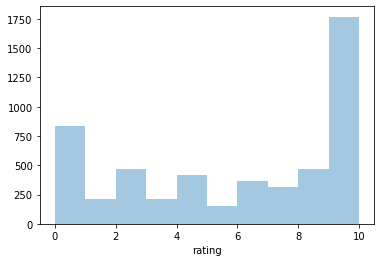

In [28]:
#Plot the distribution of user reviews

sns.distplot(cp2077_reviews['rating'], kde=False, bins=10)

In [29]:
cp2077_reviews['rating'].mean()

5.66

In [30]:
#Creating a general word cloud

#import nltk
#from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

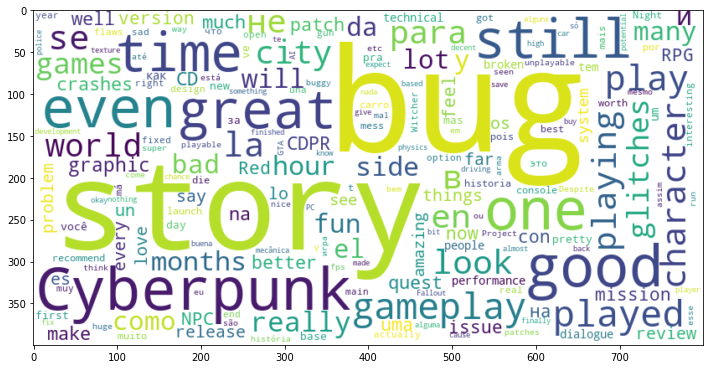

In [31]:
sentences = cp2077_reviews['review'].tolist()
textt = " ".join(sentences)
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords,
                      collocations=False, background_color='white'
                     ).generate(textt)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')

The image above shows a preliminary wordcloud for for the 5200 reviews of CyberPunk 2077 on the PS4. However, common words like "game", "PS4 Pro" are not informative, so it is best to remove them

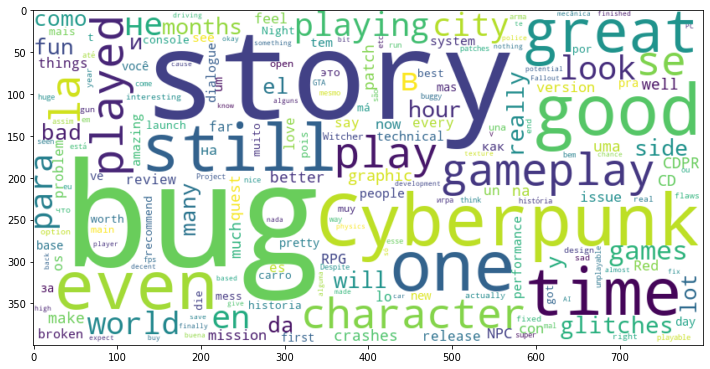

In [32]:
stopwords = set(STOPWORDS)
stopwords.update(['game', 'este juego', 'PS4 Pro', 'PS5', 'jogo', 'el juego', 'PS4', 'Pro', 
                  'este', 'juego', 's', 'de', 'n', 'que', 'não', 'o', 'e','é'])

wordcloud = WordCloud(width=800, height=400, stopwords=stopwords,
                      collocations=False, background_color='white'
                     ).generate(textt)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')

In [33]:
#This code will show top 20 words in terms of frequency
#frequencies = pd.Series(wordcloud.words_)
#frequencies.nlargest(20)

In [34]:
#classify reviews with score < 5 as negative or -1
#classify reviews with score > 5 as positive or +1 
#remove reviews with score = 5

cp = cp2077_reviews.loc[cp2077_reviews['rating'] != 5]
cp['sentiment'] = cp['rating'].apply(lambda rating : +1 if rating > 5 else -1)

#examine the dataframe
cp.head()

C:\Users\monti\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,date,rating,review,sentiment
0,eva3si0n,2021-08-19,7,Cyberpunk 2077 causes very contradictory thoug...,1
1,SusuYamoato,2021-08-15,10,Cyberpunk 2077 is masterful game of amazing lo...,1
3,Ikenda,2021-08-12,8,The game is playble and it's story and immersi...,1
4,fullcone,2021-08-11,10,Great game. After the patches of course. Some ...,1
5,tensioly,2021-08-09,8,Voy a intentar realizar el análisis más objeti...,1


In [35]:
#split the dataframe by sentiment

positive = cp[cp['sentiment'] == 1]
negative = cp[cp['sentiment'] == -1]

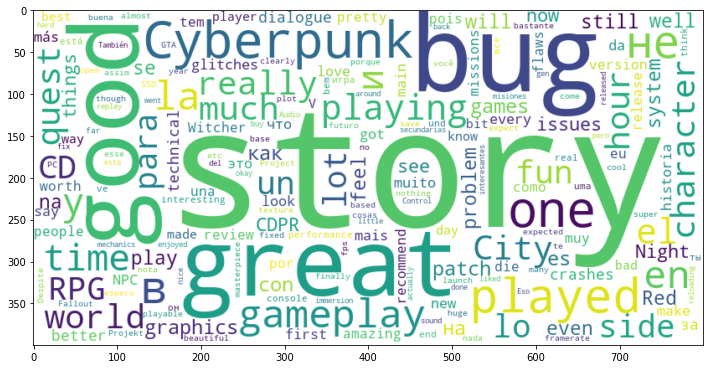

In [36]:
#show the wordcloud for positive reviews

p_sentences = positive['review'].tolist()
text2 = " ".join(p_sentences)
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords,
                      collocations=False, background_color='white'
                     ).generate(text2)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')

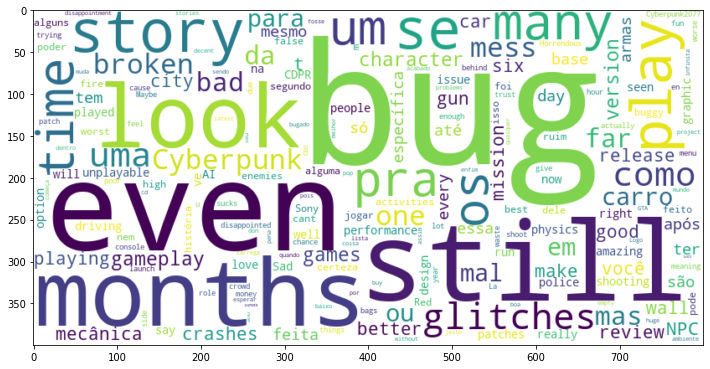

In [37]:
#show the wordcloud for negative reviews

n_sentences = negative['review'].tolist()
text3 = " ".join(n_sentences)
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords,
                      collocations=False, background_color='white'
                     ).generate(text3)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')